In [5]:
import pandas as pd
df = pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|')  # Use '..' to go up one directory
print(df.head())
print(df.info())

C:\Users\girma\AppData\Local\Temp\ipykernel_9164\2038156469.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|')  # Use '..' to go up one directory


   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

In [9]:
print(df['TransactionMonth'].head(10))  # View first 10 rows
print(df['TransactionMonth'].sample(10))  # View random 10 rows
print(df['TransactionMonth'].unique())  # View unique values (if dataset isn’t too large)

0    2015-03-01 00:00:00
1    2015-05-01 00:00:00
2    2015-07-01 00:00:00
3    2015-05-01 00:00:00
4    2015-07-01 00:00:00
5    2015-01-01 00:00:00
6    2015-04-01 00:00:00
7    2015-06-01 00:00:00
8    2015-08-01 00:00:00
9    2015-03-01 00:00:00
Name: TransactionMonth, dtype: object
327433    2015-07-01 00:00:00
849196    2015-06-01 00:00:00
445742    2015-08-01 00:00:00
320701    2015-01-01 00:00:00
294760    2015-04-01 00:00:00
251368    2015-05-01 00:00:00
238544    2014-07-01 00:00:00
996492    2015-07-01 00:00:00
382223    2015-03-01 00:00:00
975230    2015-08-01 00:00:00
Name: TransactionMonth, dtype: object
['2015-03-01 00:00:00' '2015-05-01 00:00:00' '2015-07-01 00:00:00'
 '2015-01-01 00:00:00' '2015-04-01 00:00:00' '2015-06-01 00:00:00'
 '2015-08-01 00:00:00' '2015-02-01 00:00:00' '2014-12-01 00:00:00'
 '2014-11-01 00:00:00' '2014-10-01 00:00:00' '2014-09-01 00:00:00'
 '2014-07-01 00:00:00' '2014-08-01 00:00:00' '2014-03-01 00:00:00'
 '2014-05-01 00:00:00' '2014-04-01 00:0

In [10]:
import pandas as pd

# Assuming your DataFrame is named 'df'
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], format='%Y-%m-%d %H:%M:%S')

In [11]:
print(df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate']].describe())
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
print(df['LossRatio'].describe())

       TotalPremium   TotalClaims  CustomValueEstimate
count  1.000098e+06  1.000098e+06         2.204560e+05
mean   6.190550e+01  6.486119e+01         2.255311e+05
std    2.302845e+02  2.384075e+03         5.645157e+05
min   -7.825768e+02 -1.200241e+04         2.000000e+04
25%    0.000000e+00  0.000000e+00         1.350000e+05
50%    2.178333e+00  0.000000e+00         2.200000e+05
75%    2.192982e+01  0.000000e+00         2.800000e+05
max    6.528260e+04  3.930921e+05         2.655000e+07
count    618614.0
mean          NaN
std           NaN
min          -inf
25%           0.0
50%           0.0
75%           0.0
max           inf
Name: LossRatio, dtype: float64


c:\tenx\insurance-analytics\venv\Lib\site-packages\numpy\_core\_methods.py:51: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [12]:
print(df.isnull().sum())

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [13]:
df['TotalClaims'] = df['TotalClaims'].fillna(df['TotalClaims'].median())
df['TotalPremium'] = df['TotalPremium'].fillna(df['TotalPremium'].median())
df['Province'] = df['Province'].fillna(df['Province'].mode()[0])

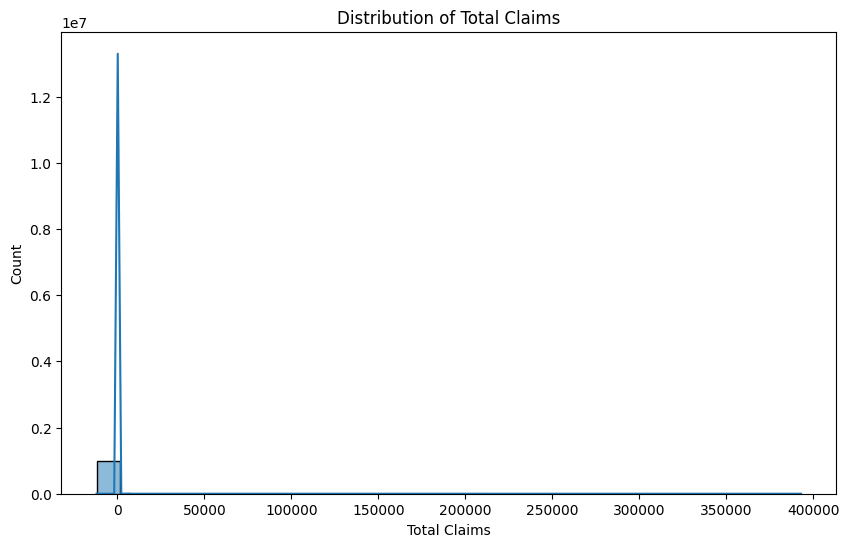

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalClaims'], bins=30, kde=True)
plt.title('Distribution of Total Claims')
plt.xlabel('Total Claims')
plt.show()

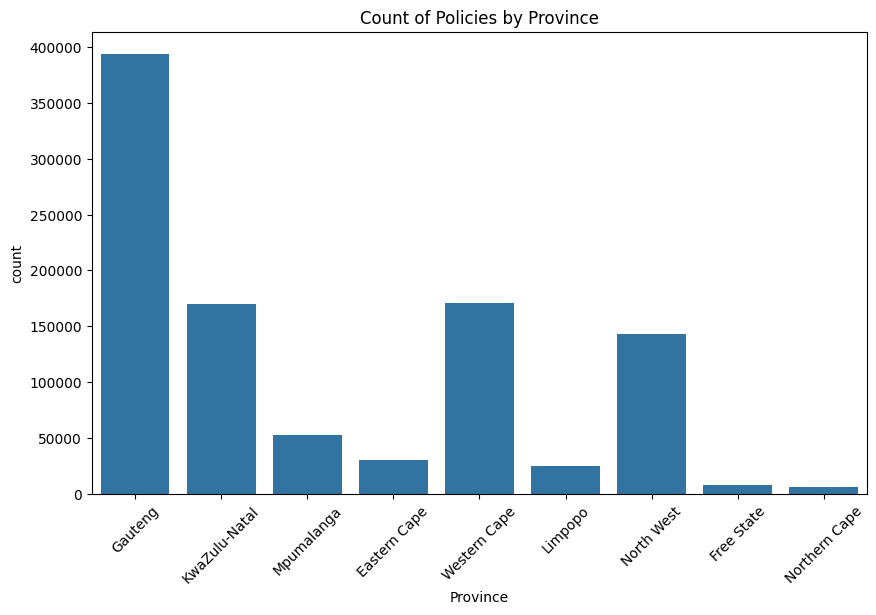

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Province', data=df)
plt.title('Count of Policies by Province')
plt.xticks(rotation=45)
plt.show()

In [18]:
print(df.groupby('Province')['LossRatio'].mean())
print(df.groupby('VehicleType')['LossRatio'].mean())
print(df.groupby('Gender')['LossRatio'].mean())

Province
Eastern Cape          inf
Free State            inf
Gauteng               NaN
KwaZulu-Natal         inf
Limpopo               inf
Mpumalanga            NaN
North West            inf
Northern Cape    0.203831
Western Cape          inf
Name: LossRatio, dtype: float64
VehicleType
Bus                       inf
Heavy Commercial          inf
Light Commercial     0.543917
Medium Commercial         inf
Passenger Vehicle         NaN
Name: LossRatio, dtype: float64
Gender
Female           inf
Male             inf
Not specified    NaN
Name: LossRatio, dtype: float64


c:\tenx\insurance-analytics\venv\Lib\site-packages\matplotlib\colors.py:2294: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
c:\tenx\insurance-analytics\venv\Lib\site-packages\matplotlib\colors.py:2295: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
c:\tenx\insurance-analytics\venv\Lib\site-packages\matplotlib\colors.py:2294: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin
c:\tenx\insurance-analytics\venv\Lib\site-packages\matplotlib\colors.py:2295: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
c:\tenx\insurance-analytics\venv\Lib\site-packages\matplotlib\colors.py:2295: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
c:\tenx\insurance-analytics\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


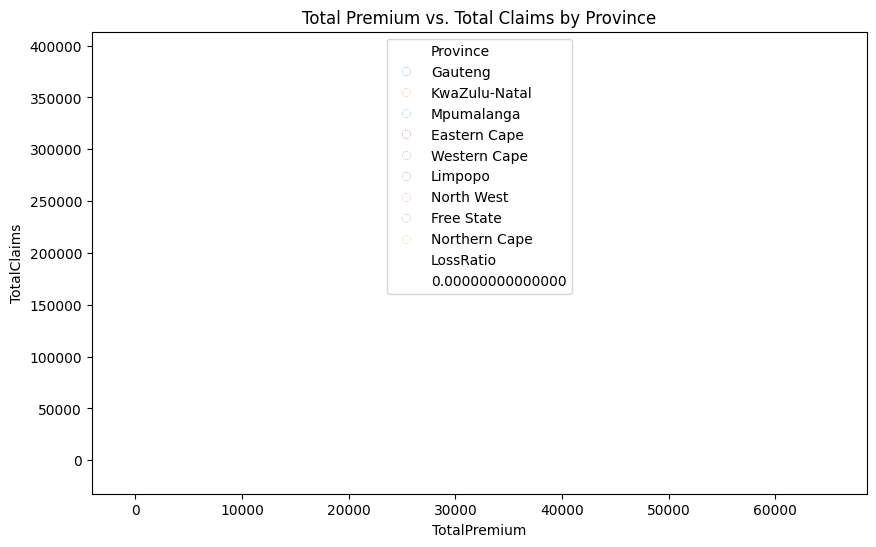

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='Province', size='LossRatio', data=df)
plt.title('Total Premium vs. Total Claims by Province')
plt.show()

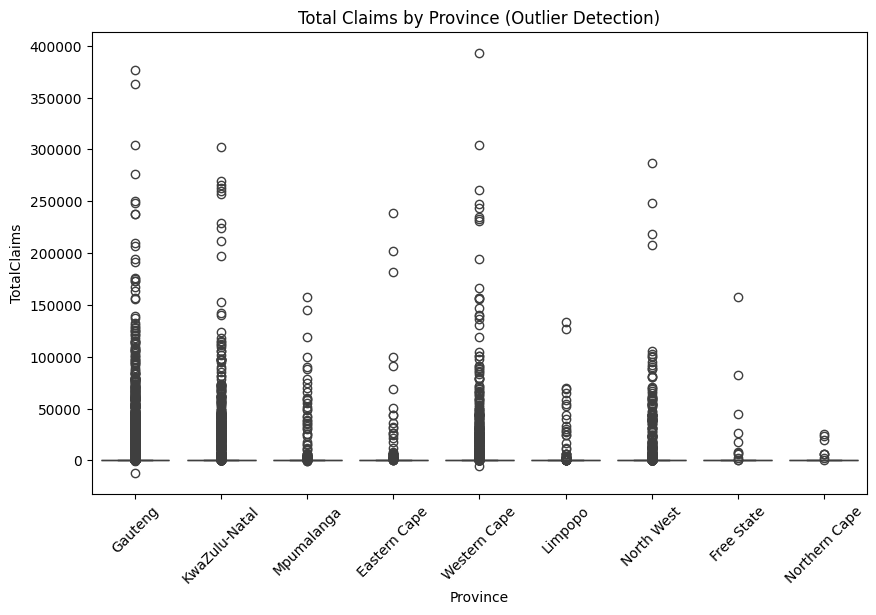

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Province', y='TotalClaims', data=df)
plt.title('Total Claims by Province (Outlier Detection)')
plt.xticks(rotation=45)
plt.show()

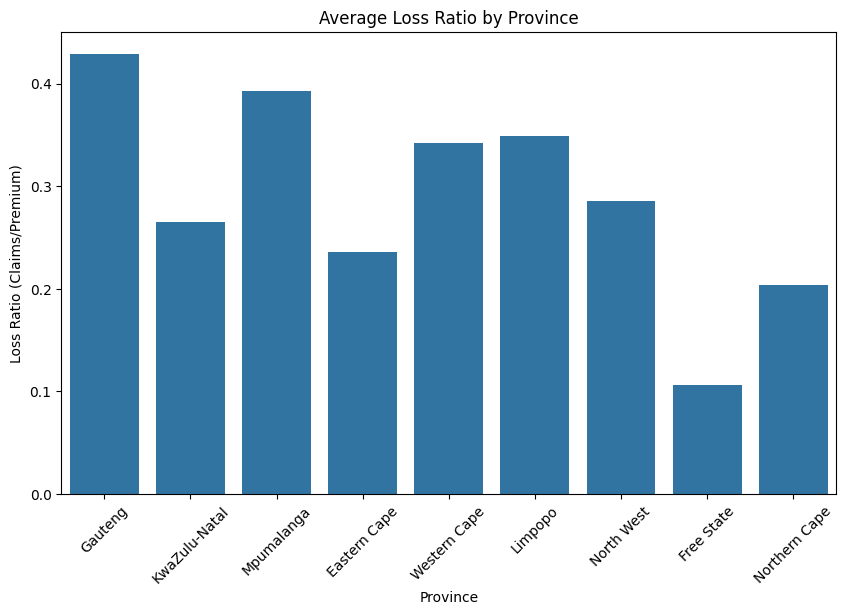

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Province', y='LossRatio', data=df, errorbar=None)
plt.title('Average Loss Ratio by Province')
plt.xticks(rotation=45)
plt.ylabel('Loss Ratio (Claims/Premium)')
plt.show()

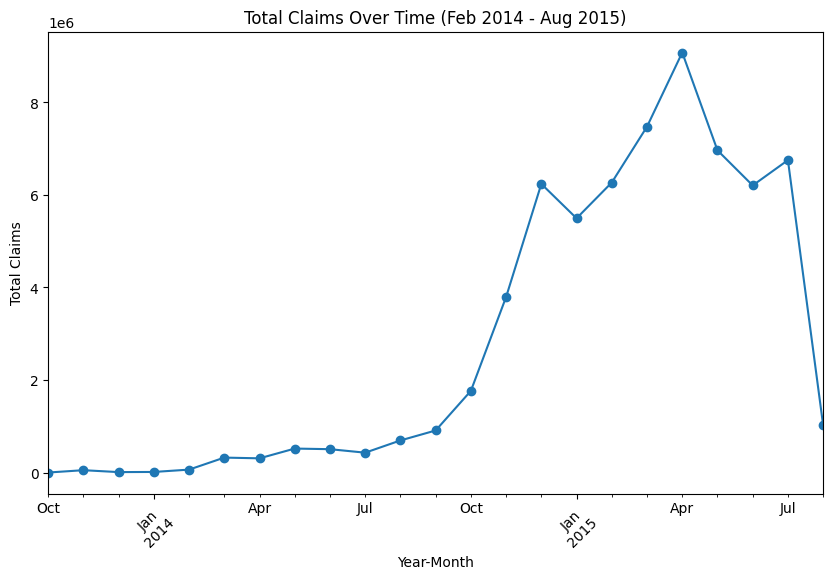

In [22]:
df['YearMonth'] = df['TransactionMonth'].dt.to_period('M')
claims_over_time = df.groupby('YearMonth')['TotalClaims'].sum()
plt.figure(figsize=(10, 6))
claims_over_time.plot(kind='line', marker='o')
plt.title('Total Claims Over Time (Feb 2014 - Aug 2015)')
plt.xlabel('Year-Month')
plt.ylabel('Total Claims')
plt.xticks(rotation=45)
plt.show()

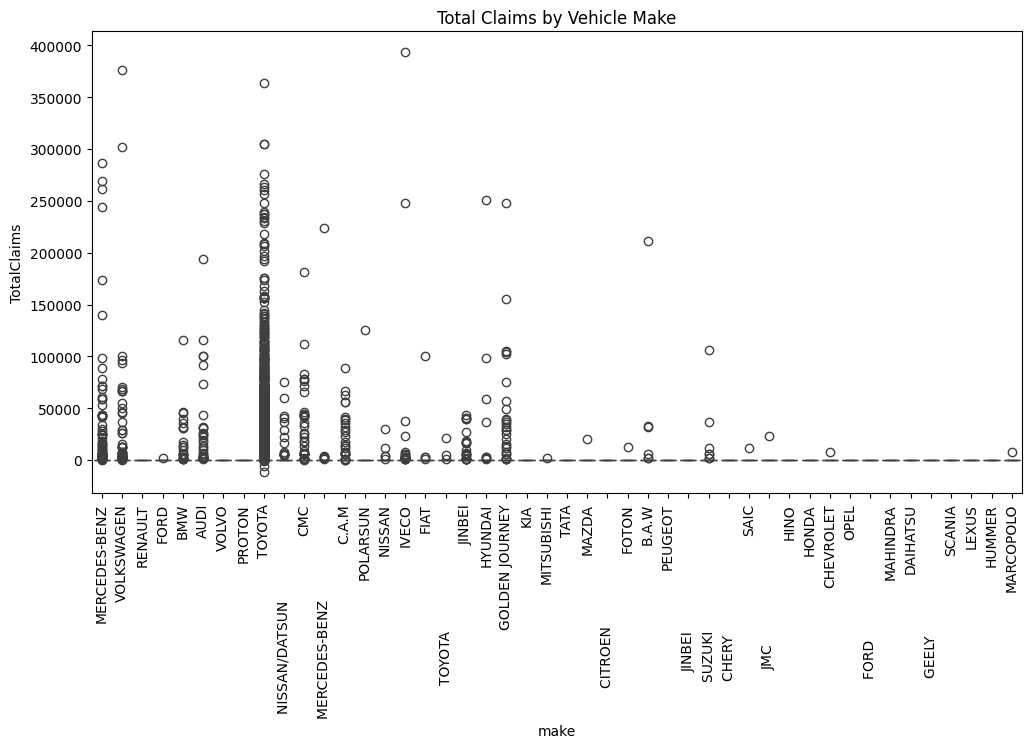

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='make', y='TotalClaims', data=df)
plt.title('Total Claims by Vehicle Make')
plt.xticks(rotation=90)
plt.show()

In [24]:
print(df.columns)

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims', 'LossRatio', 'YearMonth'],
      dtype='object')


In [27]:
df = pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|')

C:\Users\girma\AppData\Local\Temp\ipykernel_9164\1274272554.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|')


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|')

# Clean data: remove rows where TotalPremium is 0 or TotalClaims is negative/invalid
df_clean = df[(df['TotalPremium'] > 0) & (df['TotalClaims'] >= 0)]

# Verify cleaning
print(df_clean[['TotalPremium', 'TotalClaims']].describe())

C:\Users\girma\AppData\Local\Temp\ipykernel_19024\3088520476.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/MachineLearningRating_v3.txt', sep='|')


        TotalPremium    TotalClaims
count  618174.000000  618174.000000
mean      100.201396     100.442212
std       286.235103    2989.936938
min         0.000011       0.000000
25%         2.631316       0.000000
50%         7.280746       0.000000
75%        78.947368       0.000000
max     65282.603421  393092.105263


In [3]:
# Extract samples
group_a = df_clean[df_clean['Province'] == 'Gauteng']['TotalClaims'].dropna()
group_b = df_clean[df_clean['Province'] == 'KwaZulu-Natal']['TotalClaims'].dropna()

print(f"Gauteng sample size: {len(group_a)}")
print(f"KwaZulu-Natal sample size: {len(group_b)}")

Gauteng sample size: 240781
KwaZulu-Natal sample size: 111896


In [5]:
from scipy.stats import shapiro, levene

# Normality test
stat_a, p_a = shapiro(group_a)
stat_b, p_b = shapiro(group_b)
print(f"Gauteng normality p-value: {p_a}")
print(f"KwaZulu-Natal normality p-value: {p_b}")

# Variance test
stat_v, p_v = levene(group_a, group_b)
print(f"Levene's test p-value: {p_v}")

Gauteng normality p-value: 4.639944048517771e-208
KwaZulu-Natal normality p-value: 3.496156851577774e-187
Levene's test p-value: 0.6856330729732935


c:\tenx\insurance-analytics\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 240781.
  res = hypotest_fun_out(*samples, **kwds)
c:\tenx\insurance-analytics\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 111896.
  res = hypotest_fun_out(*samples, **kwds)


In [6]:
from scipy.stats import ttest_ind, mannwhitneyu

# Decide test based on assumptions
if p_a > 0.05 and p_b > 0.05 and p_v > 0.05:
    stat, p_value = ttest_ind(group_a, group_b, equal_var=True)
    test_type = "t-test"
else:
    stat, p_value = mannwhitneyu(group_a, group_b)
    test_type = "Mann-Whitney U"

print(f"{test_type} statistic: {stat}")
print(f"p-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject H0: There is a significant difference in TotalClaims between Gauteng and KwaZulu-Natal.")
else:
    print("Fail to reject H0: No significant difference in TotalClaims between Gauteng and KwaZulu-Natal.")

Mann-Whitney U statistic: 13486185070.0
p-value: 9.007541575000192e-06
Reject H0: There is a significant difference in TotalClaims between Gauteng and KwaZulu-Natal.


In [7]:
print(f"Gauteng mean TotalClaims: {group_a.mean()}")
print(f"KwaZulu-Natal mean TotalClaims: {group_b.mean()}")

Gauteng mean TotalClaims: 116.26032442234579
KwaZulu-Natal mean TotalClaims: 120.88324707058811
